In [23]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from SciKit.utils import show_report

In [24]:
X, y = make_classification(n_samples=1000, n_features=11, n_informative=3, n_redundant=2, random_state=15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       112
           1       0.79      0.86      0.83        88

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Accuracy:  0.84


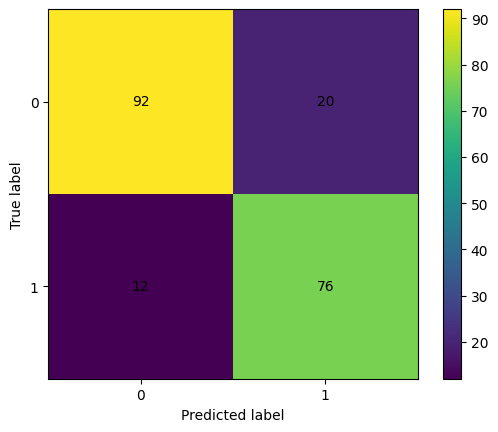

Confusion Matrix: 
 [[92 20]
 [12 76]]


In [25]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)

show_report(y_test, y_pred) # 0.88 % accuracy

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
{'bootstrap': False, 'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       104
           1       0.89      0.81      0.85        96

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

Accuracy:  0.86


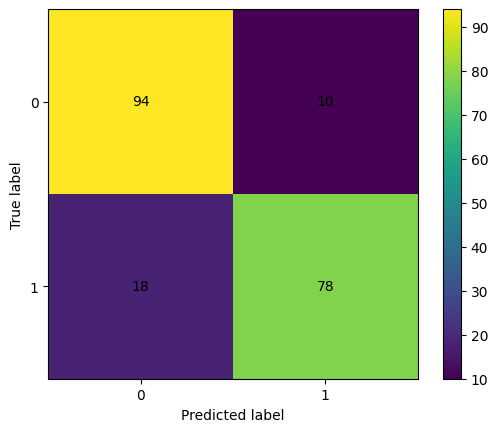

Confusion Matrix: 
 [[94 10]
 [18 78]]


In [26]:
# Param tuning

from sklearn.model_selection import GridSearchCV

param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [10, 50, 100],
    "min_samples_split": [10, 15, 25],
    "min_samples_leaf": [0.1, 0.5, 1],
    "max_features": [0.01, 0.1, 0.5],
    "bootstrap": [True, False]
}

rs = GridSearchCV(clf, param_dist, cv=3, n_jobs=-1, verbose=1, scoring="accuracy")

rs.fit(X_train, y_train)

print(rs.best_params_) # {'bootstrap': False, 'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

y_pred = rs.predict(X_test)

show_report(y_pred, y_test) # 0.86 % accuracy